In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import Cleaner as cl

dataset = cl.get_and_clean_df('../data/bilhandel_unclean.csv')

# dataset = pd.read_csv('cars.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


le = preprocessing.LabelEncoder()
X[:, 0] = le.fit_transform(X[:,0])
X[:, 1] = le.fit_transform(X[:,1])
X[:, 2] = le.fit_transform(X[:,2])
X[:, 3] = le.fit_transform(X[:,3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)
score = regressor.score(X_test,y_test)
display(score)
display(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_test), 1) ), 1))

0.37627938868971333

array([[153486.46, 129800.  ],
       [108733.5 ,  79800.  ],
       [348191.03,   4796.  ],
       ...,
       [314733.  , 335900.  ],
       [178889.49, 159900.  ],
       [151419.47, 108700.  ]])

In [6]:

#display(regressor.predict([[0, 0, 1, 9, 129000.0, '2012', '140', '5', '6', 12.8, 12.2, 202.0,1.538,4.36,346175.0]]))


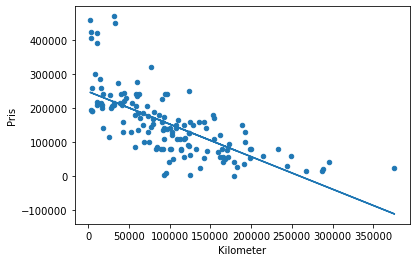

In [7]:
# Plot with km versus price

pd_km_price = dataset[dataset['Make'] == 'Honda'][['Kilometer', 'Pris']]


pd_km_price.plot.scatter(x='Kilometer', y='Pris')
#plt.ylim(150000, 1000000)
m, b = np.polyfit(pd_km_price['Kilometer'].values, pd_km_price['Pris'].values, 1)
plt.plot(pd_km_price['Kilometer'].values, m*pd_km_price['Kilometer'].values+b)


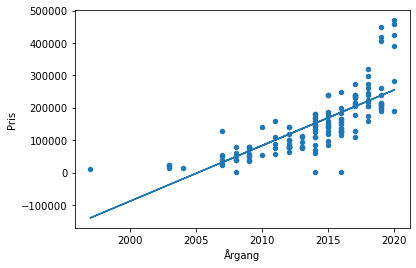

In [8]:
# Plot with km versus price

pd_year_price = dataset[dataset['Make'] == 'Honda'][['Årgang', 'Pris']]


pd_year_price.plot.scatter(x='Årgang', y='Pris')
m, b = np.polyfit(pd_year_price['Årgang'].values, pd_year_price['Pris'].values, 1)
plt.plot(pd_year_price['Årgang'].values, m*pd_year_price['Årgang'].values+b)
